# Python для анализа данных

*Татьяна Рогович, НИУ ВШЭ*


## Библиотека pandas. Работа с датами.

Очень часто мы сталкиваемся с переменными, обозначающими время. У работы с ними есть некоторые особенности, которые стоит вынести в отдельный небольшой блокнот. Здесь мы рассмотрим пример на наборе данных о встречах с НЛО.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/ufo/ufo.csv')

In [3]:
data.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


Посмотрим, что лежит в колонке Time.

In [4]:
data['Time'][0]

'6/1/1930 22:00'

In [5]:
type(data['Time'][0])

str

Можно такую историю распарсить вручную, а можно воспользоваться встроенным модулем datetime.

In [6]:
data['Time'] = pd.to_datetime(data['Time'])

In [7]:
type(data['Time'][0])

pandas._libs.tslibs.timestamps.Timestamp

Видим, что поменялся тип данных в переменной. Теперь посмотрим, что с этим можно делать.

In [8]:
data.head() # видим, что и вид данных поменялся

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


Так как это теперь объект timestamp, в его атрибутах зашиты элементы даты и мы можем к ним обращаться через ключевые слова.

In [9]:
data['Time'][0].year

1930

In [10]:
data['Time'][0].month

6

In [11]:
data['Time'][0].day

1

In [12]:
data['Time'][0].hour

22

In [13]:
data['Time'][0].minute

0

In [14]:
data['Time'][0].second

0

In [15]:
data['Time'][0].week # номер недели

22

In [16]:
data['Time'][0].day_name()

'Sunday'

Pandas способен распарсить очень много вариантов написания даты. А если он ломается всегда можно указать ему формат, в котором она записана. Можно составлять дату из нескольких колонок (посмотрим в другом примере). 

Подробнее смотрим документацию.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

Давайте, теперь попробуем использовать нашу новую переменную для аггрегации и фильтрации данных.

У модуля datetime есть атрибут, который превращает нашу переменную в объект Series, заполненную значениями, которые мы указали.

In [17]:
pd.to_datetime("4th of July, 2015")

Timestamp('2015-07-04 00:00:00')

И даже так.

In [18]:
pd.to_datetime([pd.datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])

C:\Users\mbbur\AppData\Local\Temp\ipykernel_30120\1123483094.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.to_datetime([pd.datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])


DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [26]:
data['Time'].dt.year.head() # вызвали колонку, обратились к атбриту .dt, выбрали в нем year, получили колонку заполненную годами.

0    1930
1    1930
2    1931
3    1931
4    1933
Name: Time, dtype: int64

In [27]:
data['Time'].dt.day_name().value_counts()

Tuesday      2822
Sunday       2689
Saturday     2687
Friday       2669
Thursday     2598
Wednesday    2476
Monday       2300
Name: Time, dtype: int64

А вот такой объект уже можно использовать для группировки. Давайте посчитаем, сколько НЛО видели в разные годы.

<AxesSubplot:xlabel='Time'>

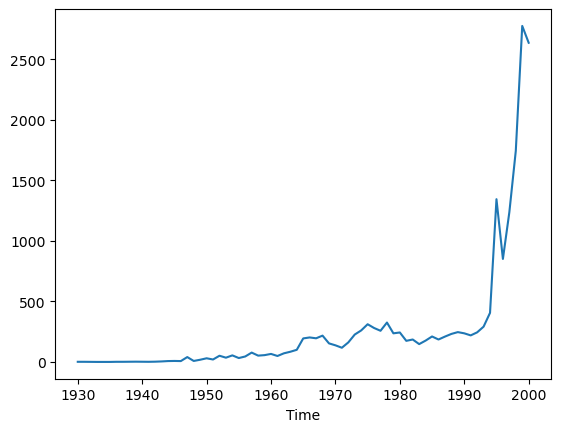

In [28]:

data.groupby(data['Time'].dt.year).size().plot()

<AxesSubplot:xlabel='Time'>

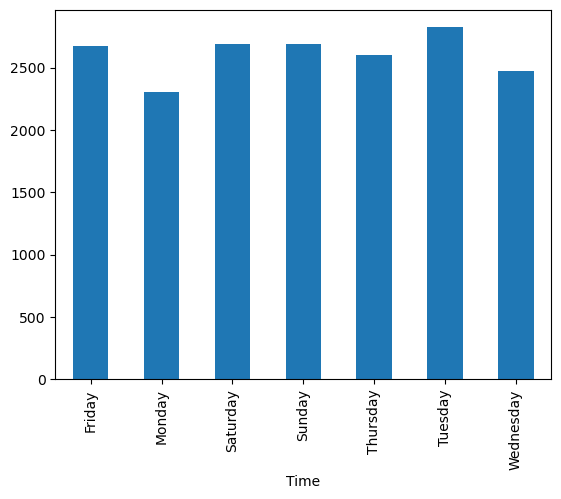

In [29]:
data.groupby(data['Time'].dt.day_name()).size().plot(kind = 'bar')

<AxesSubplot:xlabel='Time'>

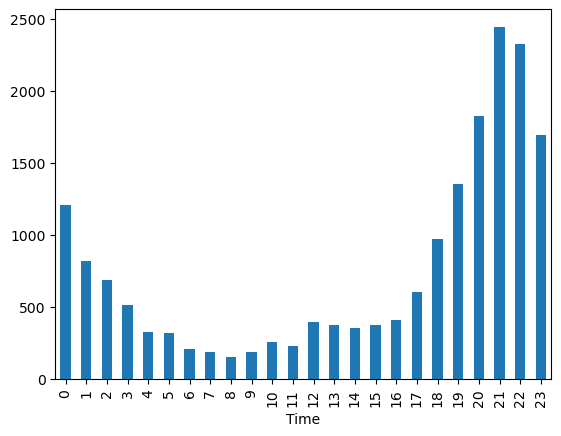

In [30]:
data.groupby(data['Time'].dt.hour).size().plot(kind = 'bar')

Посмотрим, какие есть города в нашем наборе данных

In [31]:
data['City'].value_counts()[data['City'].value_counts() > 50] # выберем только те, где НЛО видели больше 50 раз


Seattle          187
New York City    161
Phoenix          137
Houston          108
Las Vegas        105
Portland         102
San Diego        101
Los Angeles       98
Chicago           73
Austin            62
Miami             60
Tucson            58
Columbus          55
Albuquerque       54
Tacoma            52
Dallas            52
San Francisco     51
St. Louis         51
Name: City, dtype: int64

**В какой день недели чаще всего видели НЛО в Miami?**

In [32]:
data[data['City'] == 'Miami']['Time'].dt.day_name().value_counts().head(1)

Tuesday    12
Name: Time, dtype: int64

**Какой формы НЛО видели в 1956?**

In [33]:
data[data['Time'].dt.year == 1956].groupby('Shape Reported').size()

Shape Reported
CIGAR         5
CIRCLE        6
CYLINDER      1
DIAMOND       1
DISK         10
EGG           1
FIREBALL      1
FLASH         1
FORMATION     1
LIGHT         4
OTHER         4
OVAL          1
RECTANGLE     2
SPHERE        4
TRIANGLE      1
dtype: int64

**В какие месяцы видели НЛО в разные годы?**

In [34]:
data['Month'] = data.Time.dt.month
data['Year'] = data.Time.dt.year
data.head()

,City,Colors Reported,Shape Reported,State,Time,Month,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,6,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,6,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,2,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,6,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,4,1933


In [35]:
data.groupby([data.Year, data.Month]).size()

Year  Month
1930  6          2
1931  2          1
      6          1
1933  4          1
1934  9          1
              ... 
2000  8        250
      9        257
      10       278
      11       200
      12       192
Length: 640, dtype: int64

Так же колонку timestamp можно сделать индексом.

In [36]:
data.index = data['Time']

In [37]:
data.head()

,City,Colors Reported,Shape Reported,State,Time,Month,Year
Time,,,,,,,
1930-06-01 22:00:00,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,6,1930
1930-06-30 20:00:00,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,6,1930
1931-02-15 14:00:00,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,2,1931
1931-06-01 13:00:00,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,6,1931
1933-04-18 19:00:00,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,4,1933


И индексировать теперь можно поэлементно.

In [38]:
data.loc["2000-06-01"]

,City,Colors Reported,Shape Reported,State,Time,Month,Year
Time,,,,,,,
2000-06-01 00:00:00,Joshua Tree National Park,NaN,OVAL,CA,2000-06-01 00:00:00,6,2000
2000-06-01 01:00:00,Auburn,NaN,OVAL,WA,2000-06-01 01:00:00,6,2000
2000-06-01 02:00:00,San Francisco,NaN,FORMATION,CA,2000-06-01 02:00:00,6,2000
2000-06-01 12:00:00,Powhatan,NaN,LIGHT,VA,2000-06-01 12:00:00,6,2000
2000-06-01 13:00:00,Livonia,NaN,DISK,MI,2000-06-01 13:00:00,6,2000
2000-06-01 15:00:00,Albuquerque,NaN,LIGHT,NM,2000-06-01 15:00:00,6,2000
2000-06-01 15:00:00,Macon,NaN,OTHER,GA,2000-06-01 15:00:00,6,2000
2000-06-01 17:00:00,Chattanooga,NaN,DISK,TN,2000-06-01 17:00:00,6,2000
2000-06-01 20:00:00,Key West,NaN,FORMATION,FL,2000-06-01 20:00:00,6,2000


In [39]:
data.loc["June 1 2000"] # то же самое

,City,Colors Reported,Shape Reported,State,Time,Month,Year
Time,,,,,,,
2000-06-01 00:00:00,Joshua Tree National Park,NaN,OVAL,CA,2000-06-01 00:00:00,6,2000
2000-06-01 01:00:00,Auburn,NaN,OVAL,WA,2000-06-01 01:00:00,6,2000
2000-06-01 02:00:00,San Francisco,NaN,FORMATION,CA,2000-06-01 02:00:00,6,2000
2000-06-01 12:00:00,Powhatan,NaN,LIGHT,VA,2000-06-01 12:00:00,6,2000
2000-06-01 13:00:00,Livonia,NaN,DISK,MI,2000-06-01 13:00:00,6,2000
2000-06-01 15:00:00,Albuquerque,NaN,LIGHT,NM,2000-06-01 15:00:00,6,2000
2000-06-01 15:00:00,Macon,NaN,OTHER,GA,2000-06-01 15:00:00,6,2000
2000-06-01 17:00:00,Chattanooga,NaN,DISK,TN,2000-06-01 17:00:00,6,2000
2000-06-01 20:00:00,Key West,NaN,FORMATION,FL,2000-06-01 20:00:00,6,2000


Можем выбрать целый месяц в году.

In [40]:
data.loc["June 2000"].head()

,City,Colors Reported,Shape Reported,State,Time,Month,Year
Time,,,,,,,
2000-06-01 00:00:00,Joshua Tree National Park,NaN,OVAL,CA,2000-06-01 00:00:00,6,2000
2000-06-01 01:00:00,Auburn,NaN,OVAL,WA,2000-06-01 01:00:00,6,2000
2000-06-01 02:00:00,San Francisco,NaN,FORMATION,CA,2000-06-01 02:00:00,6,2000
2000-06-01 12:00:00,Powhatan,NaN,LIGHT,VA,2000-06-01 12:00:00,6,2000
2000-06-01 13:00:00,Livonia,NaN,DISK,MI,2000-06-01 13:00:00,6,2000


In [41]:
data.loc["1965"].head() # Или целый год

,City,Colors Reported,Shape Reported,State,Time,Month,Year
Time,,,,,,,
1965-01-01 17:00:00,Mokena,NaN,LIGHT,IL,1965-01-01 17:00:00,1,1965
1965-01-01 20:00:00,Conway,NaN,LIGHT,AR,1965-01-01 20:00:00,1,1965
1965-01-01 20:00:00,St. Ansgar,NaN,FIREBALL,IA,1965-01-01 20:00:00,1,1965
1965-02-01 07:30:00,Indianapolis,NaN,CIRCLE,IN,1965-02-01 07:30:00,2,1965
1965-02-02 06:00:00,Seattle,NaN,SPHERE,WA,1965-02-02 06:00:00,2,1965
